In [3]:
from prophet import Prophet
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from binance import Client
import plotly.express as px
import plotly.graph_objects as go
import math
api_key = 'kr41YsYIbL19a44v3vjifmD2vm6B0nldyQE6GQ7ulShpNpP4GdHU3Yl25Tr82TgO'
api_secret = 'TbqgIWkv45W42MDkW2cs1GYwhZGRteIBf38SeVKym85OnrszPalUyY16S7CjiO32'
client = Client(api_key, api_secret)



df=pdr.DataReader('NIO',data_source='yahoo',start='2018-11-6',end='2021-11-30')
df2=pdr.DataReader('NIO',data_source='yahoo',start='2020-1-1')

time=pd.Index(df.index)
datos=df['Open']
datos2=df2['Open']
date=datos.index
precio=datos.values

datos3=pd.DataFrame(data={'date':date,'precio':precio})
series_datos=pd.DataFrame(datos)
profet_data=pd.DataFrame(data={'ds':pd.DatetimeIndex(datos3['date']),'y':datos})
bitcoin_data=pd.DataFrame(data={'ds':pd.DatetimeIndex(datos3['date']),'y':datos})


In [38]:
klines = client.get_historical_klines('BTCUSDT',Client.KLINE_INTERVAL_1DAY,'2019 nov 9')
   
    
hj=pd.DataFrame(klines)
p=hj[4]

th = pd.Series(pd.date_range('2019-11-9',periods=p.size ,freq="1d"))
bitcoin_data=pd.DataFrame(data={'ds':th,'y':p})
bitcoin_data

,ds,y
0,2019-11-09,8809.41000000
1,2019-11-10,9039.47000000
2,2019-11-11,8733.27000000
3,2019-11-12,8821.94000000
4,2019-11-13,8777.12000000
...,...,...
790,2022-01-07,41566.48000000
791,2022-01-08,41679.74000000
792,2022-01-09,41864.62000000
793,2022-01-10,41822.49000000


In [45]:
m=Prophet(n_changepoints=10,changepoint_range=0.8,yearly_seasonality=True,daily_seasonality=True)
m.fit(bitcoin_data)
future = m.make_future_dataframe(periods=150)
future 

time_Predict=future.tail()
time_Predict

,ds
940,2022-06-06
941,2022-06-07
942,2022-06-08
943,2022-06-09
944,2022-06-10


In [46]:
forecast=m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
frame=forecast['yhat'].values
prediccion=pd.DataFrame(frame,index=forecast['ds'])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-09,5770.982209,4250.359924,12662.864916,5770.982209,5770.982209,2552.916234,2552.916234,2552.916234,-10956.722647,...,26.080385,26.080385,26.080385,13483.558496,13483.558496,13483.558496,0.0,0.0,0.0,8323.898443
1,2019-11-10,5866.496913,4474.854656,12513.384084,5866.496913,5866.496913,2601.739686,2601.739686,2601.739686,-10956.722647,...,9.476164,9.476164,9.476164,13548.986168,13548.986168,13548.986168,0.0,0.0,0.0,8468.236599
2,2019-11-11,5962.011618,4392.227442,12389.507507,5962.011618,5962.011618,2646.098152,2646.098152,2646.098152,-10956.722647,...,-3.077753,-3.077753,-3.077753,13605.898552,13605.898552,13605.898552,0.0,0.0,0.0,8608.109770
3,2019-11-12,6057.526322,5070.243262,12708.227818,6057.526322,6057.526322,2606.702517,2606.702517,2606.702517,-10956.722647,...,-89.591838,-89.591838,-89.591838,13653.017001,13653.017001,13653.017001,0.0,0.0,0.0,8664.228839
4,2019-11-13,6153.041027,4945.233919,12975.814027,6153.041027,6153.041027,2804.575738,2804.575738,2804.575738,-10956.722647,...,72.448086,72.448086,72.448086,13688.850298,13688.850298,13688.850298,0.0,0.0,0.0,8957.616765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022-06-06,45400.967078,-5345.300411,49657.565644,18840.406194,73429.444415,-23980.508609,-23980.508609,-23980.508609,-10956.722647,...,-3.077753,-3.077753,-3.077753,-13020.708209,-13020.708209,-13020.708209,0.0,0.0,0.0,21420.458469
941,2022-06-07,45350.584936,-6057.936575,50305.165438,18443.637730,73842.930445,-24038.549091,-24038.549091,-24038.549091,-10956.722647,...,-89.591838,-89.591838,-89.591838,-12992.234606,-12992.234606,-12992.234606,0.0,0.0,0.0,21312.035846
942,2022-06-08,45300.202795,-6308.672032,50120.685169,18046.869265,74066.282369,-23832.015262,-23832.015262,-23832.015262,-10956.722647,...,72.448086,72.448086,72.448086,-12947.740702,-12947.740702,-12947.740702,0.0,0.0,0.0,21468.187533
943,2022-06-09,45249.820654,-5972.815201,50630.099796,17673.874283,74347.931190,-23872.656520,-23872.656520,-23872.656520,-10956.722647,...,-24.283043,-24.283043,-24.283043,-12891.650830,-12891.650830,-12891.650830,0.0,0.0,0.0,21377.164134


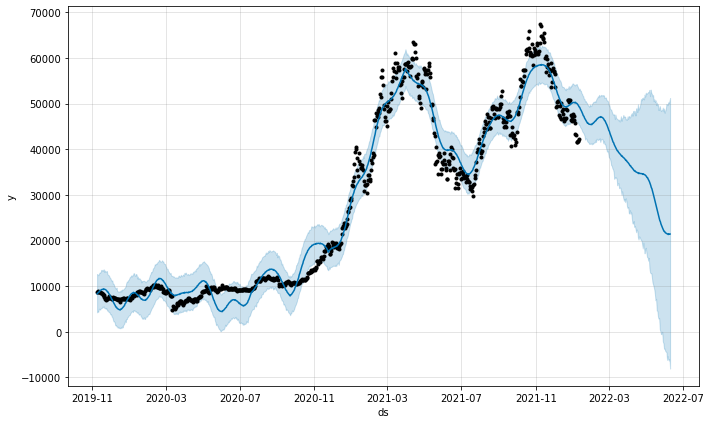

In [47]:
m.plot(forecast)
line=px.line(y=forecast['yhat'],x=forecast['ds'])
line.add_trace(go.Scatter(y=bitcoin_data['y'],x=bitcoin_data['ds']))








INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


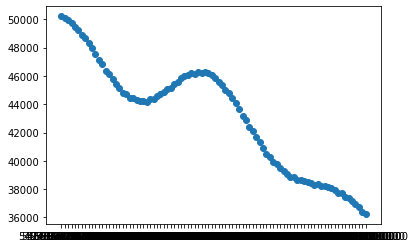